In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import pandas_datareader.data as web
from datetime import datetime as dt

In [32]:
d = web.DataReader('AMZN', 'yahoo', start= '2018-01-01', end='2019-12-31').Close


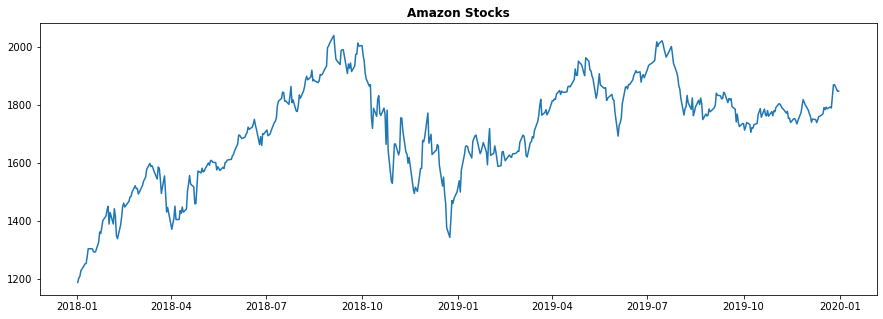

In [44]:
plt.rcParams['figure.figsize'] = [15,5]
plt.title('Amazon Stocks', fontweight='bold')
plt.plot(d)
plt.show()

In [41]:
loga = np.log(d/d.shift(1)).dropna().values

In [54]:
logarit = loga *100

In [52]:
from arch.univariate import StudentsT, ARX, GARCH

In [79]:
# ARCH specifications
model1 = ARX(logarit, lags=1)

In [83]:
prediction = resultado.summary()

In [80]:
model1.distribution = StudentsT()

In [81]:
model1.volatility= GARCH(p=1,q=1)

In [82]:
resultado = model1.fit(disp='off') # parameters estimations

In [84]:
print(prediction)

                              AR - GARCH Model Results                              
Dep. Variable:                            y   R-squared:                      -0.003
Mean Model:                              AR   Adj. R-squared:                 -0.005
Vol Model:                            GARCH   Log-Likelihood:               -946.022
Distribution:      Standardized Student's t   AIC:                           1904.04
Method:                  Maximum Likelihood   BIC:                           1929.34
                                              No. Observations:                  501
Date:                      Thu, Feb 06 2020   Df Residuals:                      495
Time:                              00:09:45   Df Model:                            6
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
C

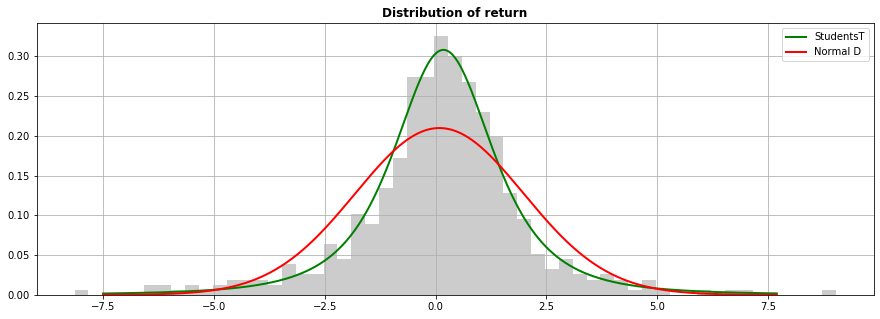

In [102]:
plt.rcParams['figure.figsize'] = [15,5]
plt.hist(logarit, bins=55, density=True, color=(.8,.8,.8))
plt.title('Distribution of return', fontweight='bold')
plt.grid(True)
plt.plot(x,fix1, color='green', linewidth=2, label= 'StudentsT')
plt.plot(x,fix2, color = 'red', linewidth=2, label = 'Normal D')
plt.legend()
plt.show()

In [92]:
para = sps.t.fit(logarit)

In [96]:
normal = sps.norm.fit(logarit)
x = np.linspace(-7.5,7.7,1000)

In [97]:
fix1 = sps.t.pdf(x, para[0],para[1],para[2])
fix2 = sps.norm.pdf(x,normal[0], normal[1])

In [2]:
import statsmodels.api as sm

In [3]:
francia = sm.datasets.get_rdataset('Guerry', 'HistData').data

In [4]:
francia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
dept               86 non-null int64
Region             85 non-null object
Department         86 non-null object
Crime_pers         86 non-null int64
Crime_prop         86 non-null int64
Literacy           86 non-null int64
Donations          86 non-null int64
Infants            86 non-null int64
Suicides           86 non-null int64
MainCity           86 non-null object
Wealth             86 non-null int64
Commerce           86 non-null int64
Clergy             86 non-null int64
Crime_parents      86 non-null int64
Infanticide        86 non-null int64
Donation_clergy    86 non-null int64
Lottery            86 non-null int64
Desertion          86 non-null int64
Instruction        86 non-null int64
Prostitutes        86 non-null int64
Distance           86 non-null float64
Area               86 non-null int64
Pop1831            86 non-null float64
dtypes: float64(2), int64(18), object(3

In [5]:
francia

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [8]:
dum = pd.get_dummies(francia, drop_first=True)

In [9]:
dum

,dept,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,...,Department_Tarn,Department_Tarn-et-Garonne,Department_Var,Department_Vaucluse,Department_Vendee,Department_Vienne,Department_Vosges,Department_Yonne,MainCity_2:Med,MainCity_3:Lg
0,1,28870,15890,37,5098,33120,35039,73,58,11,...,0,0,0,0,0,0,0,0,1,0
1,2,26226,5521,51,8901,14572,12831,22,10,82,...,0,0,0,0,0,0,0,0,1,0
2,3,26747,7925,13,10973,17044,114121,61,66,68,...,0,0,0,0,0,0,0,0,1,0
3,4,12935,7289,46,2733,23018,14238,76,49,5,...,0,0,0,0,0,0,0,0,0,0
4,5,17488,8174,69,6962,23076,16171,83,65,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,15010,4710,25,8922,35224,21851,68,43,71,...,0,0,0,0,0,1,0,0,1,0
82,87,16256,6402,13,13817,19940,33497,67,63,76,...,0,0,0,0,0,0,0,0,1,0
83,88,18835,9044,62,4040,14978,33029,82,42,51,...,0,0,0,0,0,0,1,0,1,0
84,89,18006,6516,47,4276,16616,12789,30,15,55,...,0,0,0,0,0,0,0,1,1,0


In [11]:
crime = dum.iloc[:,1]

In [13]:
m= dum.drop('Crime_pers', axis=1)

In [14]:
m

,dept,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,Crime_parents,...,Department_Tarn,Department_Tarn-et-Garonne,Department_Var,Department_Vaucluse,Department_Vendee,Department_Vienne,Department_Vosges,Department_Yonne,MainCity_2:Med,MainCity_3:Lg
0,1,15890,37,5098,33120,35039,73,58,11,71,...,0,0,0,0,0,0,0,0,1,0
1,2,5521,51,8901,14572,12831,22,10,82,4,...,0,0,0,0,0,0,0,0,1,0
2,3,7925,13,10973,17044,114121,61,66,68,46,...,0,0,0,0,0,0,0,0,1,0
3,4,7289,46,2733,23018,14238,76,49,5,70,...,0,0,0,0,0,0,0,0,0,0
4,5,8174,69,6962,23076,16171,83,65,10,22,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,4710,25,8922,35224,21851,68,43,71,20,...,0,0,0,0,0,1,0,0,1,0
82,87,6402,13,13817,19940,33497,67,63,76,68,...,0,0,0,0,0,0,0,0,1,0
83,88,9044,62,4040,14978,33029,82,42,51,58,...,0,0,0,0,0,0,1,0,1,0
84,89,6516,47,4276,16616,12789,30,15,55,32,...,0,0,0,0,0,0,0,1,1,0


In [13]:
pre_model = francia[['Instruction','Infants', 'Infanticide', 'MainCity']]

In [14]:
pre_model.head()

,Instruction,Infants,Infanticide,MainCity
0,46,33120,60,2:Med
1,24,14572,82,2:Med
2,85,17044,42,2:Med
3,29,23018,12,1:Sm
4,7,23076,23,1:Sm


In [15]:
y = pre_model.iloc[:,2]

In [16]:
X = pre_model.iloc[:,:-2]

In [17]:
dum = pd.get_dummies(pre_model['MainCity'], drop_first=True)

In [18]:
dum.columns

Index(['2:Med', '3:Lg'], dtype='object')

In [19]:
x = pd.concat([X,dum], axis=1)

In [20]:
x

,Instruction,Infants,2:Med,3:Lg
0,46,33120,1,0
1,24,14572,1,0
2,85,17044,1,0
3,29,23018,0,0
4,7,23076,0,0
...,...,...,...,...
81,65,35224,1,0
82,84,19940,1,0
83,11,14978,1,0
84,27,16616,1,0


In [21]:
model = sm.GLM(y,x)

In [22]:
resultado = model.fit()

In [23]:
prediction = resultado.summary()

In [24]:
print(prediction)

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Infanticide   No. Observations:                   86
Model:                            GLM   Df Residuals:                       82
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          733.12
Method:                          IRLS   Log-Likelihood:                -403.66
Date:                Wed, 05 Feb 2020   Deviance:                       60115.
Time:                        23:43:54   Pearson chi2:                 6.01e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Instruction    -0.2105      0.132     -1.599      

In [25]:
print('Los parametros de la regresiòn son:', resultado.params)

Los parametros de la regresiòn son: Instruction    -0.210519
Infants         0.000904
2:Med          34.155725
3:Lg           53.908651
dtype: float64
